In [18]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_8\Log\error_analysis.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_8\Data\Feature_Selection\Filtered_Features.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322278 entries, 0 to 322277
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            322278 non-null  int64  
 1   index                 322278 non-null  float64
 2   dateCrawled           322278 non-null  float64
 3   name                  322278 non-null  float64
 4   vehicleType           322278 non-null  float64
 5   yearOfRegistration    322278 non-null  float64
 6   model                 322278 non-null  float64
 7   monthOfRegistration   322278 non-null  float64
 8   fuelType              322278 non-null  float64
 9   brand                 322278 non-null  float64
 10  postalCode            322278 non-null  float64
 11  lastSeen              322278 non-null  float64
 12  abtest_control        322278 non-null  float64
 13  gearbox_automatik     322278 non-null  float64
 14  notRepairedDamage_ja  322278 non-null  float64
 15  

In [20]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
num_col = df.select_dtypes(include=[np.number]).columns.drop('kilometer_cont').tolist()
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [22]:
for col in cat_col:
    df[col]=df[col].astype(str)

In [23]:
if 'kilometer_cont' not in df.columns:
    print("⚠️ Column 'kilometer_cont' not found. Available columns are:")
    print(df.columns.tolist())
else:
    
    X = df.drop('kilometer_cont', axis=1)
    y = df['kilometer_cont']

In [24]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())

])

In [25]:

num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


In [26]:
cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [27]:
cat_pipeline

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [28]:
preprocessor=ColumnTransformer([
    
        ('num',num_pipeline,num_col),
        ('cat',cat_pipeline,cat_col)
    
])

In [29]:

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [30]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(random_state=42))
])

In [31]:

pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [33]:
pipeline.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
# Modeldan bashorat qilish
y_pred = pipeline.predict(x_test)

# Baholash
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("✅ R2 score:", r2)
print("✅ MAE:", mae)

✅ R2 score: 0.5055564538685228
✅ MAE: 1624.0344470904377


# Error Analysis

In [38]:
import numpy as np

# errors va abs_errors ni hisoblaymiz
errors = y_test - y_pred
abs_errors = np.abs(errors)

# Natijalarni jadval ko‘rinishida ko‘rsatish uchun pandas DataFrame yasaymiz
import pandas as pd

errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors,
    'Absolute Error': abs_errors
})

print(errors_df.head())

             Actual    Predicted        Error  Absolute Error
255753  1695.018364  5280.048999 -3585.030636     3585.030636
245235  8560.980362  4673.813549  3887.166813     3887.166813
297409  5477.569511  4802.750681   674.818830      674.818830
96041      0.842728     0.923647    -0.080919        0.080919
50586      0.523265     0.553971    -0.030705        0.030705


In [40]:
errors_df = errors_df.reset_index(drop=True)
x_test_reset = x_test.reset_index(drop=True)

In [41]:
full_errors_df = pd.concat([x_test_reset, errors_df], axis=1)

In [42]:
print(full_errors_df.head())

   Unnamed: 0     index  dateCrawled      name  vehicleType  \
0      255753  0.793148     0.342783  0.879748     0.857143   
1      245235  0.760574     0.173381  0.404371     0.571429   
2      297409  0.922638     0.005130  0.262344     0.857143   
3       96041  0.298283     0.704372  0.055382     0.857143   
4       50586  0.157359     0.028630  0.294407     0.714286   

   yearOfRegistration     model  monthOfRegistration  fuelType     brand  \
0            0.931034  0.818548             0.916667  0.500000  0.974359   
1            0.344828  0.991935             0.500000  0.166667  0.435897   
2            0.655172  0.713710             0.333333  0.166667  0.230769   
3            0.310345  0.116935             0.250000  0.166667  0.025641   
4            0.482759  0.423387             0.500000  0.166667  0.256410   

   postalCode  lastSeen  abtest_control  gearbox_automatik  \
0    0.114080  0.202389             0.0                0.0   
1    0.763199  0.108142             1.0 

In [43]:

print(full_errors_df.columns)

Index(['Unnamed: 0', 'index', 'dateCrawled', 'name', 'vehicleType',
       'yearOfRegistration', 'model', 'monthOfRegistration', 'fuelType',
       'brand', 'postalCode', 'lastSeen', 'abtest_control',
       'gearbox_automatik', 'notRepairedDamage_ja', 'Actual', 'Predicted',
       'Error', 'Absolute Error'],
      dtype='object')


In [44]:
error_cols = full_errors_df[['name', 'Error', 'Absolute Error']]
print(error_cols.head(10))

       name        Error  Absolute Error
0  0.879748 -3585.030636     3585.030636
1  0.404371  3887.166813     3887.166813
2  0.262344   674.818830      674.818830
3  0.055382    -0.080919        0.080919
4  0.294407    -0.030705        0.030705
5  0.331986    -0.027520        0.027520
6  0.124148  -261.866471      261.866471
7  0.650387  -508.051078      508.051078
8  0.134784  4715.494705     4715.494705
9  0.316247   976.725124      976.725124


# Worst Prediction

In [45]:
# 4️⃣ Sort by largest absolute errors
worst_predictions = full_errors_df.sort_values(by='Absolute Error', ascending=False).head(10)

print("🔎 Top 10 Worst Predictions:")
display(worst_predictions[['Actual', 'Predicted', 'Error', 'Absolute Error']])

🔎 Top 10 Worst Predictions:


,Actual,Predicted,Error,Absolute Error
34452,9791.736290,2646.930932,7144.805358,7144.805358
41519,149.273142,7266.911311,-7117.638169,7117.638169
6453,9476.608080,2850.050794,6626.557285,6626.557285
36939,270.874500,6744.833831,-6473.959332,6473.959332
19354,828.154666,7284.675257,-6456.520591,6456.520591
32033,81.539585,6347.089004,-6265.549419,6265.549419
58326,968.810678,7233.720374,-6264.909696,6264.909696
48646,64.161328,6258.229941,-6194.068613,6194.068613
57255,44.536907,6233.774962,-6189.238055,6189.238055
37039,9748.262239,3566.722176,6181.540064,6181.540064


# Error Distribution

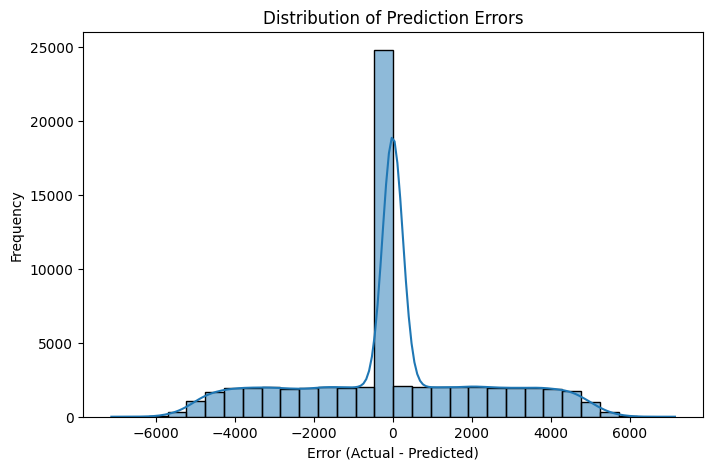

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# Actual vs Predicted

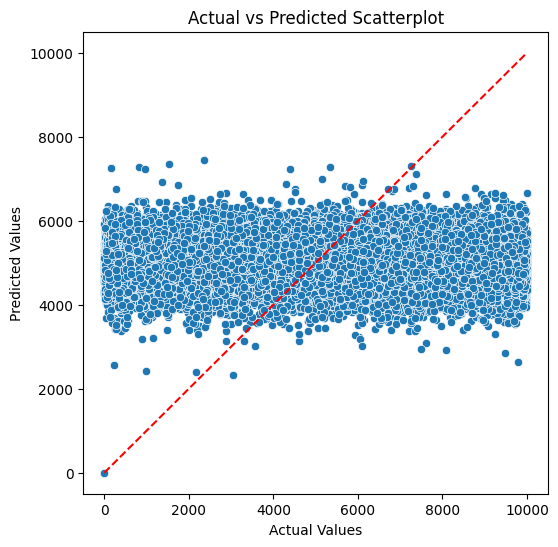

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal chiziq
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatterplot")
plt.show()